In [1]:
import sys
!{sys.executable} -m pip install kagglehub
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install torch



[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

path = kagglehub.dataset_download("mexwell/employee-performance-and-productivity-data")

filename = "Extended_Employee_Performance_and_Productivity_Data.csv"
df = pd.read_csv(path+'\\'+filename)


F:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Для удобства анализа округлим мотивацию и удовлетворение

In [3]:
df['Round_Satisfaction'] = df['Employee_Satisfaction_Score'].round()
df['Round_Promotions'] = df['Promotions'].round()

Для удобства будем строить графики из точек, они дают меньше шума на плотных данных по сравнению с графиками из линий.
Для больше наглядности построим графики из точек, таким образом чтобы размер точки показывал количество сотрудников соответвующим эти условиям.
Построим график зависимости возраста и срока работы в компании, можно ожидать что чем старше сотрудник тем он дольше работает, а молодые сотрудники не могли работать в кампании больше пары лет.

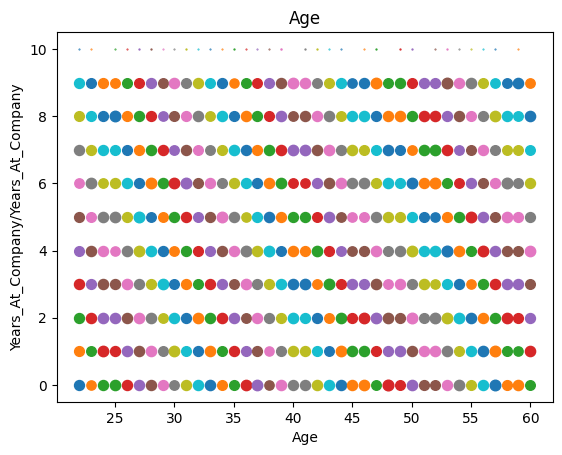

In [4]:
agg_data_education2performance = df.groupby(['Age', 'Years_At_Company']).size().reset_index(name='Count')
for index, row in agg_data_education2performance.iterrows():
    plt.scatter(row['Age'], row['Years_At_Company'], s=row['Count'] * 0.2)
plt.xlabel('Age')
plt.ylabel('Years_At_Company')
plt.title('Age')
plt.ylabel('Years_At_Company/Years_At_Company')
plt.show()

В компании есть сотрудник имеющий стаж 10 лет и возрастом 22 года, можно предположить что либо в компанию принимают с 12 лет, либо данные синтетические.
Так же можно заметить что данные распределены очень равномерно, но сотрудников работающих 10 лет гораздо меньше остальных.
Сотрудников работающих дольше 10 лет нет, что странно.

Простроим гистограмму распределения возрастов среди сотрудников. Можно ожидать что это будет нормальное распределение,
которое характерно для естественных случайных данных.

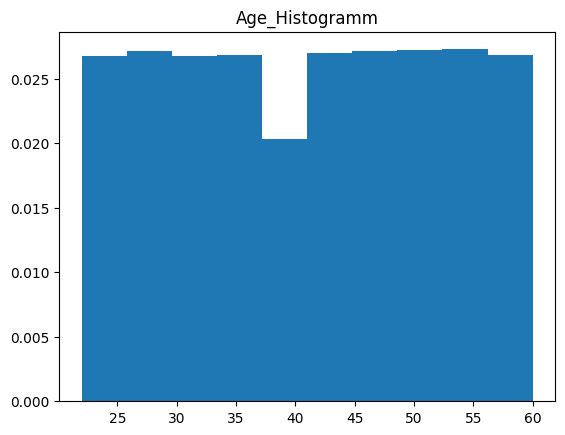

In [5]:
plt.hist(df['Age'], density=True, bins=10)
plt.title('Age_Histogramm')
plt.show()

Распределение возрастов слишком равномерное, с небольшим провалом в районе 40 лет.

Простроим точный график зависимости зарплаты от образования. Можно предположить что сотдрудники с докторской степенью получают большую зарплату.

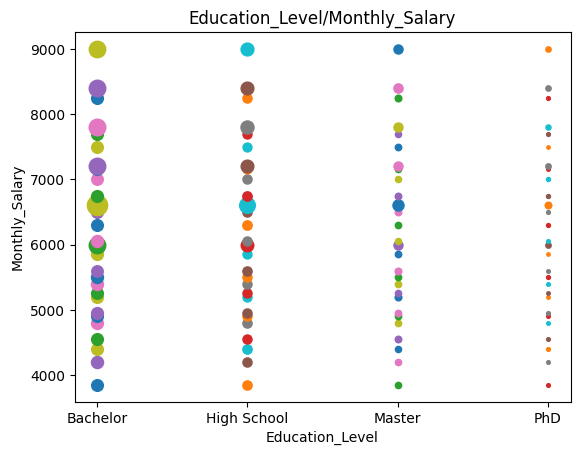

In [6]:
agg_data_education2performance = df.groupby(['Monthly_Salary', 'Education_Level']).size().reset_index(name='Count')
for index, row in agg_data_education2performance.iterrows():
    plt.scatter(row['Education_Level'], row['Monthly_Salary'], s=row['Count'] * 0.05)
plt.xlabel('Education_Level')
plt.ylabel('Monthly_Salary')
plt.title('Education_Level/Monthly_Salary')
plt.show()

Минимальная и максимальная зарплата сотрудников не зависит от их уровня образования. Количество тех или иных сотрудников меняется, но нет чётко выраженной зависимости.

Простроим точный график зависимости производительность от образования.
Сложно заранее сказать как зависит производительность от образования, но весьма вероятно что зависимость есть.

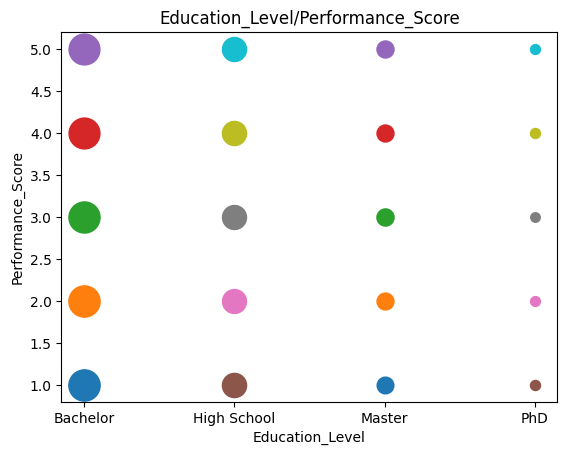

In [7]:
agg_data_education2performance = df.groupby(['Education_Level', 'Performance_Score']).size().reset_index(name='Count')

for index, row in agg_data_education2performance.iterrows():
    plt.scatter(row['Education_Level'], row['Performance_Score'], s=row['Count'] * 0.05)
plt.xlabel('Education_Level')
plt.ylabel('Performance_Score')
plt.title('Education_Level/Performance_Score')
plt.show()

Сотрудников с высшим образованием меньше, но оно не имеет явного влияние на производительность. Кружки в столбцах одинакогово размера.

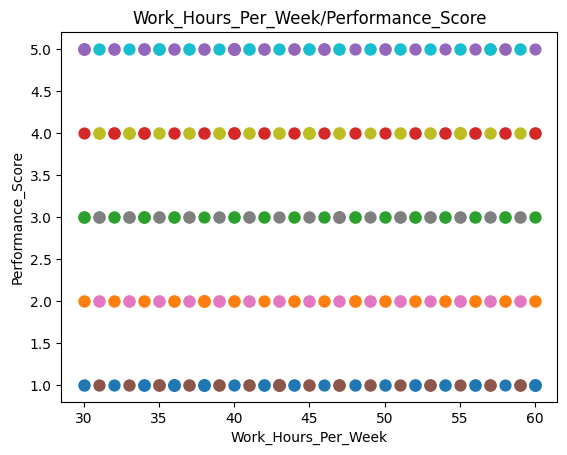

In [8]:
agg_data_hours2performance = df.groupby(['Work_Hours_Per_Week', 'Performance_Score']).size().reset_index(name='Count')

for index, row in agg_data_hours2performance.iterrows():
    plt.scatter(row['Work_Hours_Per_Week'], row['Performance_Score'], s=row['Count']*0.1)
    
plt.xlabel('Work_Hours_Per_Week')
plt.ylabel('Performance_Score')
plt.title('Work_Hours_Per_Week/Performance_Score')
plt.show()


Количество часов работы в неделю не влияет на производительность. Размер кружков идеально совпадает что нехарактерно для реальных данных.

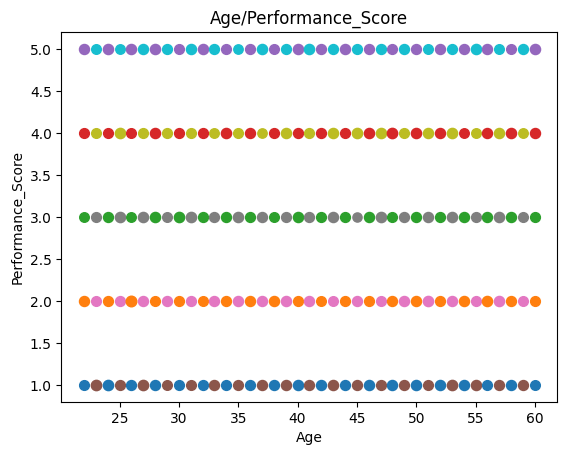

In [9]:
agg_data_age2performance = df.groupby(['Age', 'Performance_Score']).size().reset_index(name='Count')

for index, row in agg_data_age2performance.iterrows():
    plt.scatter(row['Age'], row['Performance_Score'], s=row['Count']*0.1)
    
plt.xlabel('Age')
plt.ylabel('Performance_Score')
plt.title('Age/Performance_Score')
plt.show()

Похоже что возраст не влияет на производительность сотрудника. Размер кружков так же идеально совпадает.

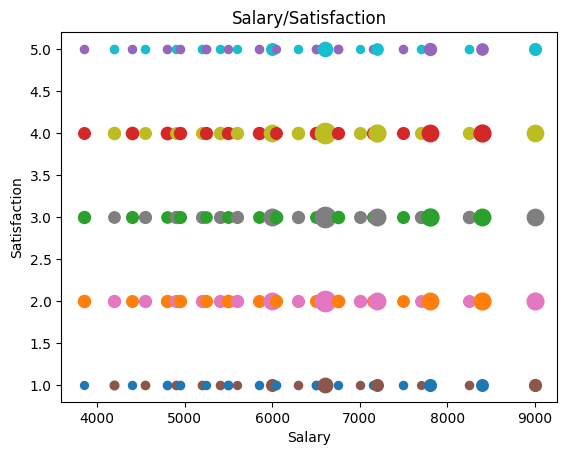

In [10]:
agg_data_age2performance = df.groupby(['Monthly_Salary', 'Round_Satisfaction']).size().reset_index(name='Count')

for index, row in agg_data_age2performance.iterrows():
    plt.scatter(row['Monthly_Salary'], row['Round_Satisfaction'], s=row['Count']*0.1)
    
plt.xlabel('Salary')
plt.ylabel('Satisfaction')
plt.title('Salary/Satisfaction')
plt.show()

Похоже что зарплата не влияет на удовлетворенность сотрудника

По имеющимся графикам можно предположить следующие гипотезы:
1) Нет выраженной завимости удовлетворенности сотрудника от его зарплаты.
2) Возраст совершенно не влияет на производительность сотрудника
3) Количество часов работы в неделю совершенно не влияет на производительность
Анализ просроенных графиков не дал особых результатов что заставляет предположить что данные умышленно создавались с равномерным распределением (хотя для естественных данных более характерно нормальное распределение) и без выраженной корреляции.



Поскольку попарный анализ не дал результата попробуем обучить несколько моделей,с увеличением сложности. 

Перед обучением удалим добавленные столбцы, так как они дублируют исходные данные.

In [11]:
df.drop('Round_Satisfaction', axis=1, inplace=True)
df.drop('Round_Promotions', axis=1, inplace=True)

Для последующей проверки моделей разобём данные на обучающий набор и на текстовый в соотношении 8 к 2.

In [12]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

Попробуем предсказать Resigned (увольнение) на основе других данных. В принципе можно предсказывать вектор из всех трёх признаков (Performance_Score, Employee_Satisfaction_Score, Resigned), но в задании указано обучить модель предсказывать один признак.
Для первой модели возьмём только числовые значения и без модификации передадим их в модель.
Используем простую модель с одним скрытым слоем.
Используем L1Loss и Adam специально для ненормированных данных.

GPU доступен для обучения
Epoch 1/50, Loss: 6.213614463806152
Epoch 2/50, Loss: 13.345586776733398
Epoch 3/50, Loss: 30.271915435791016
Epoch 4/50, Loss: 72.72984313964844
Epoch 5/50, Loss: 81.12991333007812
Epoch 6/50, Loss: 13.79377555847168
Epoch 7/50, Loss: 36.02478790283203
Epoch 8/50, Loss: 64.28765869140625
Epoch 9/50, Loss: 2.0739564895629883
Epoch 10/50, Loss: 42.583438873291016
Epoch 11/50, Loss: 17.938352584838867
Epoch 12/50, Loss: 8.861406326293945
Epoch 13/50, Loss: 46.26032257080078
Epoch 14/50, Loss: 48.92681884765625
Epoch 15/50, Loss: 25.613487243652344
Epoch 16/50, Loss: 28.321369171142578
Epoch 17/50, Loss: 20.421783447265625
Epoch 18/50, Loss: 24.848663330078125
Epoch 19/50, Loss: 11.785618782043457
Epoch 20/50, Loss: 11.205052375793457
Epoch 21/50, Loss: 33.18191909790039
Epoch 22/50, Loss: 6.499650478363037
Epoch 23/50, Loss: 27.601070404052734
Epoch 24/50, Loss: 22.753015518188477
Epoch 25/50, Loss: 11.017252922058105
Epoch 26/50, Loss: 14.869222640991211
Epoch 

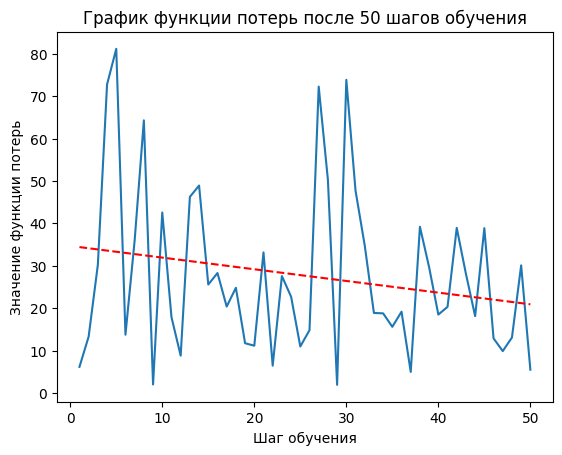

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU доступен для обучения")
else:
    device = torch.device("cpu")
    print("GPU недоступен, обучение будет происходить на CPU")
    
numerical_cols = train_df.select_dtypes(include=['float', 'int', 'bool']).astype(float)

columns_to_exclude = ['Resigned']
# Подготовка данных
x = numerical_cols.drop(columns=columns_to_exclude)
y = numerical_cols[columns_to_exclude]

x = torch.tensor(x.values, dtype=torch.float32).to(device)
y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)

# Создание DataLoader
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)


# Создание модели
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.hidden_layer  = nn.Linear(x.shape[1], 64)
        self.output_layer = nn.Linear(64, y.shape[1])
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden_layer(x))
        x = self.output_layer(x)
        return x

raw_data_model = RegressionModel().to(device)
criterion = nn.L1Loss()
optimizer = optim.Adam(raw_data_model.parameters(), lr=0.001)

# Обучение модели
losses = []
num_epochs = 50
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = raw_data_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
plt.plot(range(1, len(losses) + 1), losses)
plt.xlabel('Шаг обучения')
plt.ylabel('Значение функции потерь')
plt.title('График функции потерь после 50 шагов обучения')
x = np.array(range(1, len(losses) + 1))
z = np.polyfit(x, losses, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()

Результаты не очень хорошие, функция потерь довольно нестабильна. Попробуем нормировать числовые данные.
А так же будем использвать MSELoss и SGD так они лучше подходят для нормированных данных.

GPU доступен для обучения
Epoch 1/50, Loss: 0.0718819797039032
Epoch 2/50, Loss: 0.1064920425415039
Epoch 3/50, Loss: 0.09653881192207336
Epoch 4/50, Loss: 0.09295063465833664
Epoch 5/50, Loss: 0.07493530213832855
Epoch 6/50, Loss: 0.08577875792980194
Epoch 7/50, Loss: 0.113433837890625
Epoch 8/50, Loss: 0.10973064601421356
Epoch 9/50, Loss: 0.11526850610971451
Epoch 10/50, Loss: 0.1236376091837883
Epoch 11/50, Loss: 0.09691804647445679
Epoch 12/50, Loss: 0.12158918380737305
Epoch 13/50, Loss: 0.08676252514123917
Epoch 14/50, Loss: 0.08586761355400085
Epoch 15/50, Loss: 0.08596263825893402
Epoch 16/50, Loss: 0.07262951135635376
Epoch 17/50, Loss: 0.116562619805336
Epoch 18/50, Loss: 0.07970760017633438
Epoch 19/50, Loss: 0.066984161734581
Epoch 20/50, Loss: 0.12349405884742737
Epoch 21/50, Loss: 0.07353176176548004
Epoch 22/50, Loss: 0.0861118882894516
Epoch 23/50, Loss: 0.07791205495595932
Epoch 24/50, Loss: 0.10326715558767319
Epoch 25/50, Loss: 0.07815182209014893
Epoch 26/50, Loss:

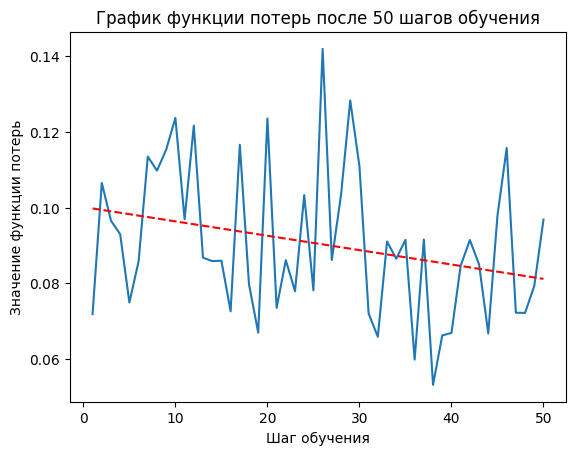

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU доступен для обучения")
else:
    device = torch.device("cpu")
    print("GPU недоступен, обучение будет происходить на CPU")
    
numerical_cols = train_df.select_dtypes(include=['float', 'int', 'bool']).astype(float)
min_values = numerical_cols.min()
max_values = numerical_cols.max()

# Минимакс нормализация для каждого столбца
numerical_cols = (numerical_cols - min_values) / (max_values - min_values)

columns_to_exclude = ['Resigned']
# Подготовка данных
x = numerical_cols.drop(columns=columns_to_exclude)
y = numerical_cols[columns_to_exclude]

x = torch.tensor(x.values, dtype=torch.float32).to(device)
y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)

# Создание DataLoader
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)


# Создание модели
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.hidden_layer = nn.Linear(x.shape[1], 64)
        self.output_layer = nn.Linear(64, y.shape[1])
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden_layer(x))
        x = self.output_layer(x)
        return x

prepared_data_model = RegressionModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(prepared_data_model.parameters(), lr=0.01)

# Обучение модели
losses = []
num_epochs = 50
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = prepared_data_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
plt.plot(range(1, len(losses) + 1), losses)
plt.xlabel('Шаг обучения')
plt.ylabel('Значение функции потерь')
plt.title('График функции потерь после 50 шагов обучения')
x = np.array(range(1, len(losses) + 1))
z = np.polyfit(x, losses, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()

GPU доступен для обучения
Epoch 1/50, Loss: 0.060010820627212524
Epoch 2/50, Loss: 0.10882135480642319
Epoch 3/50, Loss: 0.10216858237981796
Epoch 4/50, Loss: 0.05650649592280388
Epoch 5/50, Loss: 0.10664106905460358
Epoch 6/50, Loss: 0.07405722141265869
Epoch 7/50, Loss: 0.11875833570957184
Epoch 8/50, Loss: 0.15295878052711487
Epoch 9/50, Loss: 0.09195472300052643
Epoch 10/50, Loss: 0.0982428789138794
Epoch 11/50, Loss: 0.06580539047718048
Epoch 12/50, Loss: 0.1277792751789093
Epoch 13/50, Loss: 0.09246410429477692
Epoch 14/50, Loss: 0.12578371167182922
Epoch 15/50, Loss: 0.11263509094715118
Epoch 16/50, Loss: 0.10340597480535507
Epoch 17/50, Loss: 0.09708350896835327
Epoch 18/50, Loss: 0.055068619549274445
Epoch 19/50, Loss: 0.14165697991847992
Epoch 20/50, Loss: 0.06661352515220642
Epoch 21/50, Loss: 0.09855403006076813
Epoch 22/50, Loss: 0.1049751341342926
Epoch 23/50, Loss: 0.060963451862335205
Epoch 24/50, Loss: 0.08057811856269836
Epoch 25/50, Loss: 0.10488232225179672
Epoch 26

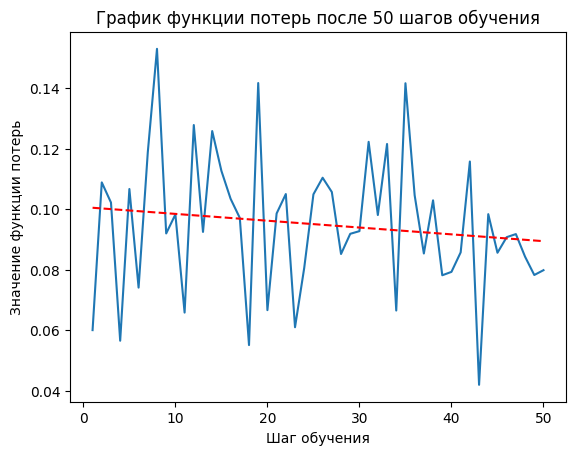

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU доступен для обучения")
else:
    device = torch.device("cpu")
    print("GPU недоступен, обучение будет происходить на CPU")
    
numerical_cols = train_df.select_dtypes(include=['float', 'int', 'bool']).astype(float)
numerical_cols.drop('Employee_ID', axis=1, inplace=True)



        
min_values = numerical_cols.min()
max_values = numerical_cols.max()

# Минимакс нормализация для каждого столбца
numerical_cols = (numerical_cols - min_values) / (max_values - min_values)

string_cols = list(train_df.select_dtypes(include=['object']).columns)
string_cols.remove('Hire_Date')
encoded_dfs = []
for col in string_cols:
    one_hot_encoded = pd.get_dummies(train_df[col], prefix=col).astype(float)
    encoded_dfs.append(one_hot_encoded)

numerical_cols = pd.concat([numerical_cols] + encoded_dfs, axis=1)

columns_to_exclude = ['Resigned']
# Подготовка данных
x = numerical_cols.drop(columns=columns_to_exclude)
y = numerical_cols[columns_to_exclude]

x = torch.tensor(x.values, dtype=torch.float32).to(device)
y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.hidden_layer = nn.Linear(x.shape[1], 64)
        self.output_layer = nn.Linear(64, y.shape[1])
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden_layer(x))
        x = self.output_layer(x)
        return x
        
# Создание DataLoader
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)
full_data_model = RegressionModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(full_data_model.parameters(), lr=0.01)

# Обучение модели
losses = []
num_epochs = 50
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = full_data_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
plt.plot(range(1, len(losses) + 1), losses)
plt.xlabel('Шаг обучения')
plt.ylabel('Значение функции потерь')
plt.title('График функции потерь после 50 шагов обучения')
x = np.array(range(1, len(losses) + 1))
z = np.polyfit(x, losses, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()

Это результат выглядит лучше функция потерь убывает заметно быстрее.

Попробуем на полных нормализованныех данных запустить однослойную модель, возможно есть простая зависимость и внутрений слой избыточен.

GPU доступен для обучения
Epoch 1/50, Loss: 0.09129322320222855
Epoch 2/50, Loss: 0.11451512575149536
Epoch 3/50, Loss: 0.15287388861179352
Epoch 4/50, Loss: 0.13091585040092468
Epoch 5/50, Loss: 0.1851290762424469
Epoch 6/50, Loss: 0.1773533970117569
Epoch 7/50, Loss: 0.12317591160535812
Epoch 8/50, Loss: 0.20654337108135223
Epoch 9/50, Loss: 0.16263720393180847
Epoch 10/50, Loss: 0.09328082203865051
Epoch 11/50, Loss: 0.09495830535888672
Epoch 12/50, Loss: 0.0745183527469635
Epoch 13/50, Loss: 0.149009108543396
Epoch 14/50, Loss: 0.1240464299917221
Epoch 15/50, Loss: 0.12803062796592712
Epoch 16/50, Loss: 0.153008371591568
Epoch 17/50, Loss: 0.09947521984577179
Epoch 18/50, Loss: 0.12853464484214783
Epoch 19/50, Loss: 0.1547463983297348
Epoch 20/50, Loss: 0.1496424674987793
Epoch 21/50, Loss: 0.1335814893245697
Epoch 22/50, Loss: 0.11907372623682022
Epoch 23/50, Loss: 0.10922333598136902
Epoch 24/50, Loss: 0.13009682297706604
Epoch 25/50, Loss: 0.1990911215543747
Epoch 26/50, Loss: 0

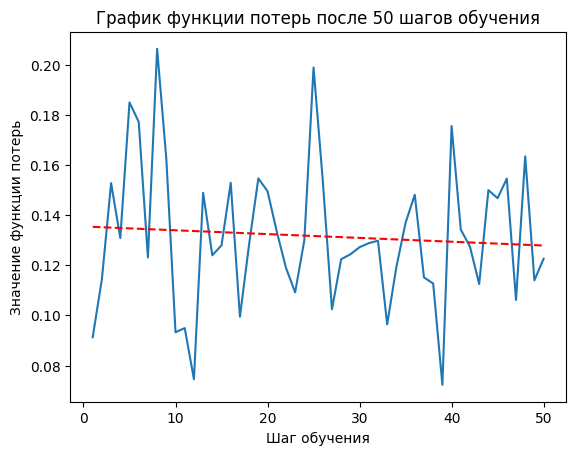

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU доступен для обучения")
else:
    device = torch.device("cpu")
    print("GPU недоступен, обучение будет происходить на CPU")
    
numerical_cols = train_df.select_dtypes(include=['float', 'int', 'bool']).astype(float)
numerical_cols.drop('Employee_ID', axis=1, inplace=True)



        
min_values = numerical_cols.min()
max_values = numerical_cols.max()

# Минимакс нормализация для каждого столбца
numerical_cols = (numerical_cols - min_values) / (max_values - min_values)

string_cols = list(train_df.select_dtypes(include=['object']).columns)
string_cols.remove('Hire_Date')
encoded_dfs = []
for col in string_cols:
    one_hot_encoded = pd.get_dummies(train_df[col], prefix=col).astype(float)
    encoded_dfs.append(one_hot_encoded)

numerical_cols = pd.concat([numerical_cols] + encoded_dfs, axis=1)

columns_to_exclude = ['Resigned']
# Подготовка данных
x = numerical_cols.drop(columns=columns_to_exclude)
y = numerical_cols[columns_to_exclude]

x = torch.tensor(x.values, dtype=torch.float32).to(device)
y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.output_layer = nn.Linear(x.shape[1], y.shape[1])

    def forward(self, x):
        return self.output_layer(x)
        
# Создание DataLoader
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)
one_layer_model = RegressionModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(one_layer__model.parameters(), lr=0.01)

# Обучение модели
losses = []
num_epochs = 50
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = one_layer_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
plt.plot(range(1, len(losses) + 1), losses)
plt.xlabel('Шаг обучения')
plt.ylabel('Значение функции потерь')
plt.title('График функции потерь после 50 шагов обучения')
x = np.array(range(1, len(losses) + 1))
z = np.polyfit(x, losses, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()

Результат однослойной модели выглядит заметно хуже, но необходимо объективное сравнение.

Для этого возмём данные для тестов, подготовим их для каждой из моделей и посчитаем среднюю абсолютную ошибку (MAE) и среднеквадратичную ошибку (MSE)

Начнём с модели работающей с сырыми данными

In [21]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

numerical_cols = test_df.select_dtypes(include=['float', 'int', 'bool']).astype(float)

columns_to_exclude = ['Resigned']
# Подготовка данных
x = numerical_cols.drop(columns=columns_to_exclude)
y = numerical_cols[columns_to_exclude]

x = torch.tensor(x.values, dtype=torch.float32).to(device)
y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)

# Создание DataLoader
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)
# Настройка модели на режим предсказания
raw_data_model.eval()

# Проверка работы модели на тестовом датасете
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = raw_data_model(inputs)
        predictions.extend(outputs.cpu().numpy())
        true_labels.extend(targets.cpu().numpy())

predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Вычисление метрик для оценки модели
# Например, вы можете посчитать среднюю абсолютную ошибку (MAE) или среднеквадратичную ошибку (MSE)
raw_data_model_mae = np.mean(np.abs(predictions - true_labels))
raw_data_model_mse = np.mean((predictions - true_labels) ** 2)

print(f'MAE: {raw_data_model_mae}')
print(f'MSE: {raw_data_model_mse}')

MAE: 48.68732452392578
MSE: 3198.377197265625


In [ ]:
Затем протестируем модель с нормированнымми данными, но без категориальных данных.

In [22]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

numerical_cols = test_df.select_dtypes(include=['float', 'int', 'bool']).astype(float)
min_values = numerical_cols.min()
max_values = numerical_cols.max()

# Минимакс нормализация для каждого столбца
numerical_cols = (numerical_cols - min_values) / (max_values - min_values)

columns_to_exclude = ['Resigned']
# Подготовка данных
x = numerical_cols.drop(columns=columns_to_exclude)
y = numerical_cols[columns_to_exclude]

x = torch.tensor(x.values, dtype=torch.float32).to(device)
y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)

# Создание DataLoader
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)
# Настройка модели на режим предсказания
prepared_data_model.eval()

# Проверка работы модели на тестовом датасете
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = prepared_data_model(inputs)
        predictions.extend(outputs.cpu().numpy())
        true_labels.extend(targets.cpu().numpy())

predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Вычисление метрик для оценки модели
# Например, вы можете посчитать среднюю абсолютную ошибку (MAE) или среднеквадратичную ошибку (MSE)
prepared_data_model_mae = np.mean(np.abs(predictions - true_labels))
prepared_data_model_mse = np.mean((predictions - true_labels) ** 2)

print(f'MAE: {prepared_data_model_mae}')
print(f'MSE: {prepared_data_model_mse}')

MAE: 0.18043555319309235
MSE: 0.08898354321718216


Затем модель работающую с полными нормированными данными

In [23]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

numerical_cols = test_df.select_dtypes(include=['float', 'int', 'bool']).astype(float)
numerical_cols.drop('Employee_ID', axis=1, inplace=True)
       
min_values = numerical_cols.min()
max_values = numerical_cols.max()

# Минимакс нормализация для каждого столбца
numerical_cols = (numerical_cols - min_values) / (max_values - min_values)

string_cols = list(test_df.select_dtypes(include=['object']).columns)
string_cols.remove('Hire_Date')
encoded_dfs = []
for col in string_cols:
    one_hot_encoded = pd.get_dummies(test_df[col], prefix=col).astype(float)
    encoded_dfs.append(one_hot_encoded)

numerical_cols = pd.concat([numerical_cols] + encoded_dfs, axis=1)

columns_to_exclude = ['Resigned']
# Подготовка данных
x = numerical_cols.drop(columns=columns_to_exclude)
y = numerical_cols[columns_to_exclude]

x = torch.tensor(x.values, dtype=torch.float32).to(device)
y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)

# Создание DataLoader
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)
# Настройка модели на режим предсказания
full_data_model.eval()

# Проверка работы модели на тестовом датасете
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = full_data_model(inputs)
        predictions.extend(outputs.cpu().numpy())
        true_labels.extend(targets.cpu().numpy())

predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Вычисление метрик для оценки модели
# Например, вы можете посчитать среднюю абсолютную ошибку (MAE) или среднеквадратичную ошибку (MSE)
full_data_model_mae = np.mean(np.abs(predictions - true_labels))
full_data_model_mse = np.mean((predictions - true_labels) ** 2)

print(f'MAE: {full_data_model_mae}')
print(f'MSE: {full_data_model_mse}')

MAE: 0.1783197820186615
MSE: 0.08905943483114243


И наконец однослойную модель обученную на полных нормированных данных

In [25]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

numerical_cols = test_df.select_dtypes(include=['float', 'int', 'bool']).astype(float)
numerical_cols.drop('Employee_ID', axis=1, inplace=True)
       
min_values = numerical_cols.min()
max_values = numerical_cols.max()

# Минимакс нормализация для каждого столбца
numerical_cols = (numerical_cols - min_values) / (max_values - min_values)

string_cols = list(test_df.select_dtypes(include=['object']).columns)
string_cols.remove('Hire_Date')
encoded_dfs = []
for col in string_cols:
    one_hot_encoded = pd.get_dummies(test_df[col], prefix=col).astype(float)
    encoded_dfs.append(one_hot_encoded)

numerical_cols = pd.concat([numerical_cols] + encoded_dfs, axis=1)

columns_to_exclude = ['Resigned']
# Подготовка данных
x = numerical_cols.drop(columns=columns_to_exclude)
y = numerical_cols[columns_to_exclude]

x = torch.tensor(x.values, dtype=torch.float32).to(device)
y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)

# Создание DataLoader
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)
# Настройка модели на режим предсказания
one_layer_model.eval()

# Проверка работы модели на тестовом датасете
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = one_layer_model(inputs)
        predictions.extend(outputs.cpu().numpy())
        true_labels.extend(targets.cpu().numpy())

predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Вычисление метрик для оценки модели
# Например, вы можете посчитать среднюю абсолютную ошибку (MAE) или среднеквадратичную ошибку (MSE)
one_layer_model_mae = np.mean(np.abs(predictions - true_labels))
one_layer_model_mse = np.mean((predictions - true_labels) ** 2)

print(f'MAE: {one_layer_model_mae}')
print(f'MSE: {one_layer_model_mse}')

MAE: 0.23940756916999817
MSE: 0.12766295671463013


И наконец построим графики для результатов разных моделей обученных за 50 шагов

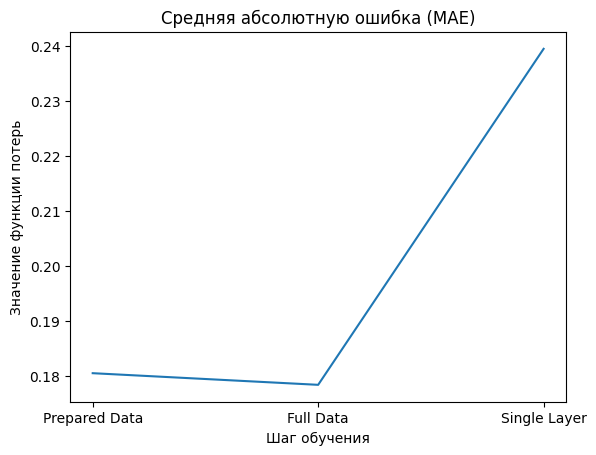

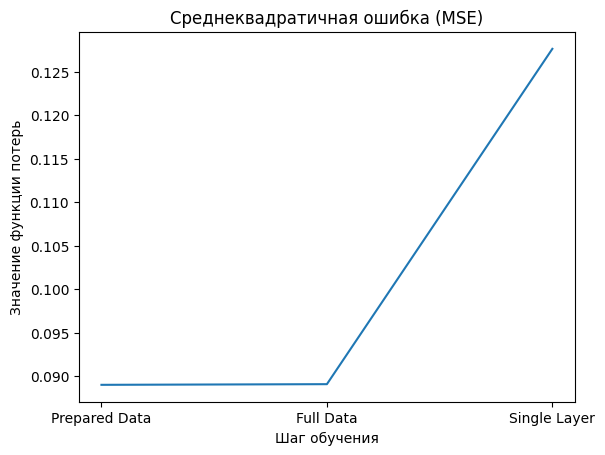

In [28]:
plt.plot(['Prepared Data','Full Data','Single Layer'], [prepared_data_model_mae, full_data_model_mae, one_layer_model_mae])
plt.xlabel('Шаг обучения')
plt.ylabel('Значение функции потерь')
plt.title('Cредняя абсолютную ошибка (MAE)')
plt.show()
		 

plt.plot(['Prepared Data','Full Data','Single Layer'], [prepared_data_model_mse, full_data_model_mse, one_layer_model_mse])
plt.xlabel('Шаг обучения')
plt.ylabel('Значение функции потерь')
plt.title('Среднеквадратичная ошибка (MSE)')
plt.show()

Из графиков можно увидеть что обучение на полных данных даёт результат чуть лучше чем обучение только на численных данных.
А модель без внутрененего слоя показывает заметно более худший результат чем модели с внутренним слоем.
Значение ошибки для сырых данных не показано на графике так как он очень велико (абсалюьная ошибка порядка 50 и средквадратичная порядка 3000)